In [137]:
# Q1

# equation to measure thickness of folded paper
def exp_eq(num_folds):
    return 0.1 * (2 ** num_folds)

def problem_one():
    # convert height of mt everest from m to mm
    height_mt_everest = 8848 * 1000
    num_folds = 0
    res = exp_eq(num_folds)
    while res <= height_mt_everest:
        num_folds += 1
        res = exp_eq(num_folds)
    return num_folds

print("number of folds:", problem_one())


number of folds: 27


In [147]:
# Q2

import math

# volume of water decreasing formula
def water_vol_eq(v_0, t, a):
    return v_0 * (math.e ** (-a * t))

def problem_two():
    v_0 = 100
    a = 0.1
    t = 0
    res = water_vol_eq(v_0, t, a)
    while res >= (v_0 / 2):
        t += 1
        res = water_vol_eq(v_0, t, a)
    return t

print("t =", problem_two())
    

t = 7


In [139]:
# Q3

# compound interest formula
def compound_interest_eq(p, r, n, t):
    return p * ((1 + (r / n)) ** (n * t))

def problem_three():
    p = 100
    r = 0.05
    n = 1
    # money after 1 year
    res = round(compound_interest_eq(p, r, n, 1))
    print("1 year:", res)
    
    # money after 2 years
    res = round(compound_interest_eq(p, r, n, 2))
    print("2 years:", res)
    
    # money after 3 years
    res = round(compound_interest_eq(p, r, n, 3))
    print("3 years:", res)
    
    # money after 4 years
    res = round(compound_interest_eq(p, r, n, 4))
    print("4 years:", res)
    
    # money after 5 years
    res = round(compound_interest_eq(p, r, n, 5))
    print("5 years:", res)
    
problem_three()

1 year: 105
2 years: 110
3 years: 116
4 years: 122
5 years: 128


In [140]:
# Q4

# loan payment formula
def loan_payment_eq(p, r, n):
    return p * ((r * ((1 + r) ** n)) / (((1 + r) ** n) - 1))

def problem_four():
    # principal amount
    p = 20000
    
    # interest rate
    r = 0.01
    
    # monthly payment to pay off debt in 1 year
    res = round(loan_payment_eq(p, r, 1 * 12))
    print("monthly payment to pay off debt in 1 year:", res)
    
    # monthly payment to pay off debt in 2 years
    res = round(loan_payment_eq(p, r, 2 * 12))
    print("monthly payment to pay off debt in 2 years:", res)
    
    # monthly payment to pay off debt in 3 years
    res = round(loan_payment_eq(p, r, 3 * 12))
    print("monthly payment to pay off debt in 3 years:", res)
    
problem_four()

monthly payment to pay off debt in 1 year: 1777
monthly payment to pay off debt in 2 years: 941
monthly payment to pay off debt in 3 years: 664


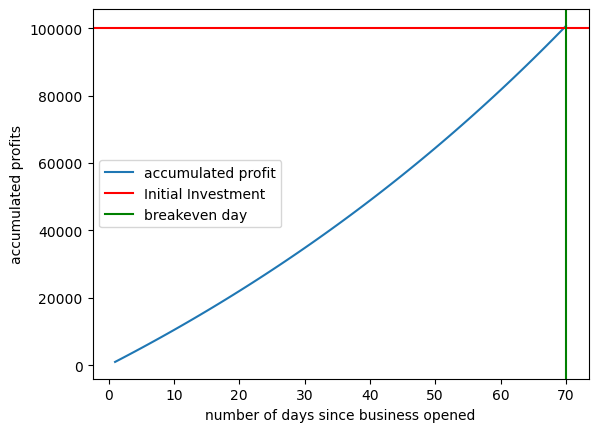

number of days to break even with investment: 70


In [141]:
# Q5

import matplotlib.pyplot as plt
import numpy as np

def problem_five():
    # daily growth rate
    r = 1.01
    
    # number of customers on day 1
    c_0 = 100
    
    # profit per customer (dollars)
    profit_per_customer = 10
    
    t = 0
    curr_profit = 0
    curr_num_customers = c_0
    
    # cumulated profits of t days
    total_profit = 0
    
    # list containing days since restaurant opened
    x = []
    
    # list containing accumulated profits after t days
    y = []
    while total_profit < 100000:
        # current profit of day t
        curr_profit = curr_num_customers * profit_per_customer
        total_profit += curr_profit
        t += 1
        x.append(t)
        y.append(total_profit)
        # increase number of customers by rate r every day the restaurant is opened
        curr_num_customers *= r
    x = np.array(x)
    y = np.array(y)
    plt.plot(x, y, label = "accumulated profit")
    plt.xlabel("number of days since business opened")
    plt.ylabel("accumulated profits")
    
    # marking initial investment
    plt.axhline(y = 100000, color = 'r', linestyle = '-', label = "Initial Investment")
    
    # marking breakeven day
    plt.axvline(x = t, color = 'g', linestyle = '-', label = "breakeven day")
    
    plt.legend()
    plt.show()
    return t
print("number of days to break even with investment:", problem_five())

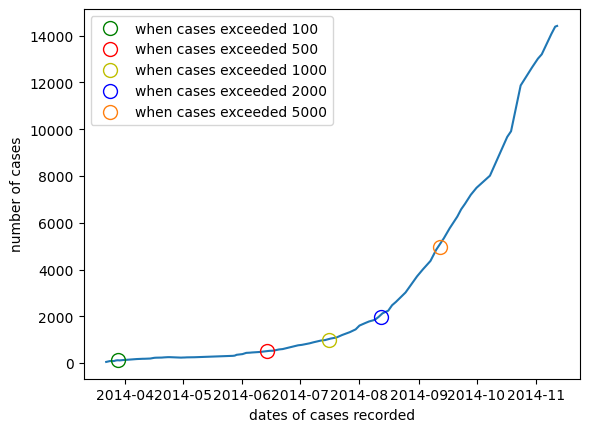

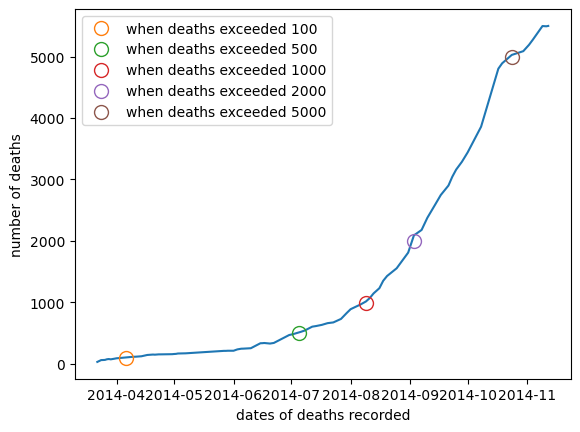

date exceeded 100 cases: 2014-03-28
date exceeded 500 cases: 2014-06-14
date exceeded 1000 cases: 2014-07-16
date exceeded 2000 cases: 2014-08-12
date exceeded 5000 cases: 2014-09-12
date exceeded 100 deaths: 2014-04-06
date exceeded 500 deaths: 2014-07-05
date exceeded 1000 deaths: 2014-08-09
date exceeded 2000 deaths: 2014-09-03
date excceeded 5000 deaths: 2014-10-24


In [166]:
# Q6

import matplotlib.pyplot as plt
import micropip
import numpy as np
import pandas as pd

from scipy.interpolate import interp1d

def problem_six():
    workbook = pd.read_excel('ebola_download.xls')
    cases = np.array(workbook['Cases'])
    dates = np.array(workbook['Date'], dtype='datetime64[D]')
    deaths = np.array(workbook['Death'])
    num_days = np.array(workbook['Noofdays'])

    fig, ax = plt.subplots()
    plt.plot(dates, cases)
    plt.xlabel("dates of cases recorded")
    plt.ylabel("number of cases")
    
    # linear interpolation function for cases
    x_interp = interp1d(cases, num_days)
    
    # finding date where number of cases exceeded 100 
    num_days_exceeded = round(float(x_interp(100)))
    exceeded_100_cases_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_100_cases = np.interp(num_days_exceeded, num_days, cases)
    ax.plot_date(exceeded_100_cases_date, num_exceeded_100_cases, 'og', fillstyle='none', ms=10.0, label = "when cases exceeded 100")
    
    # finding date where number of cases exceeded 500
    num_days_exceeded = round(float(x_interp(500)))
    exceeded_500_cases_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_500_cases = np.interp(num_days_exceeded, num_days, cases)
    ax.plot_date(exceeded_500_cases_date, num_exceeded_500_cases, 'or', fillstyle='none', ms=10.0, label = "when cases exceeded 500")
    
    # finding date where number of cases exceeded 1000
    num_days_exceeded = round(float(x_interp(1000)))
    exceeded_1000_cases_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_1000_cases = np.interp(num_days_exceeded, num_days, cases)
    ax.plot_date(exceeded_1000_cases_date, num_exceeded_1000_cases, 'oy', fillstyle='none', ms=10.0, label = "when cases exceeded 1000")
    
    # finding date where number of cases exceeded 2000
    num_days_exceeded = round(float(x_interp(2000)))
    exceeded_2000_cases_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_2000_cases = np.interp(num_days_exceeded, num_days, cases)
    ax.plot_date(exceeded_2000_cases_date, num_exceeded_2000_cases, 'ob', fillstyle='none', ms=10.0, label = "when cases exceeded 2000")
    
    # finding date where number of cases exceeded 5000
    num_days_exceeded = round(float(x_interp(5000)))
    exceeded_5000_cases_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_5000_cases = np.interp(num_days_exceeded, num_days, cases)
    ax.plot_date(exceeded_5000_cases_date, num_exceeded_5000_cases, 'o', fillstyle='none', ms=10.0, label = "when cases exceeded 5000")
    
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    plt.plot(dates, deaths)
    plt.xlabel("dates of deaths recorded")
    plt.ylabel("number of deaths")
    
    # linear interpolation function for deaths
    x_interp = interp1d(deaths, num_days)
    
    # finding date where number of deaths exceeded 100
    num_days_exceeded = round(float(x_interp(100)))
    exceeded_100_deaths_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_100_deaths = np.interp(num_days_exceeded, num_days, deaths)
    ax.plot_date(exceeded_100_deaths_date, num_exceeded_100_deaths, 'o', fillstyle='none', ms=10.0, label = "when deaths exceeded 100")
    
    # finding date where number of deaths exceeded 500
    num_days_exceeded = round(float(x_interp(500)))
    exceeded_500_deaths_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_500_deaths = np.interp(num_days_exceeded, num_days, deaths)
    ax.plot_date(exceeded_500_deaths_date, num_exceeded_500_deaths, 'o', fillstyle='none', ms=10.0, label = "when deaths exceeded 500")
    
    # finding date where number of deaths exceeded 1000
    num_days_exceeded = round(float(x_interp(1000)))
    exceeded_1000_deaths_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_1000_deaths = np.interp(num_days_exceeded, num_days, deaths)
    ax.plot_date(exceeded_1000_deaths_date, num_exceeded_1000_deaths, 'o', fillstyle='none', ms=10.0, label = "when deaths exceeded 1000")
    
    # finding date where number of deaths exceeded 2000
    num_days_exceeded = round(float(x_interp(2000)))
    exceeded_2000_deaths_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_2000_deaths = np.interp(num_days_exceeded, num_days, deaths)
    ax.plot_date(exceeded_2000_deaths_date, num_exceeded_2000_deaths, 'o', fillstyle='none', ms=10.0, label = "when deaths exceeded 2000")
    
    # finding date where number of deaths exceeded 5000
    num_days_exceeded = round(float(x_interp(5000)))
    exceeded_5000_deaths_date = np.datetime64('2014-03-22') + np.timedelta64(num_days_exceeded, 'D')
    num_exceeded_5000_deaths = np.interp(num_days_exceeded, num_days, deaths)
    ax.plot_date(exceeded_5000_deaths_date, num_exceeded_5000_deaths, 'o', fillstyle='none', ms=10.0, label = "when deaths exceeded 5000")
    
    plt.legend()
    plt.show()
    
    print("date exceeded 100 cases:", exceeded_100_cases_date)
    print("date exceeded 500 cases:", exceeded_500_cases_date)
    print("date exceeded 1000 cases:", exceeded_1000_cases_date)
    print("date exceeded 2000 cases:", exceeded_2000_cases_date)
    print("date exceeded 5000 cases:", exceeded_5000_cases_date)
    
    print("date exceeded 100 deaths:", exceeded_100_deaths_date)
    print("date exceeded 500 deaths:", exceeded_500_deaths_date)
    print("date exceeded 1000 deaths:", exceeded_1000_deaths_date)
    print("date exceeded 2000 deaths:", exceeded_2000_deaths_date)
    print("date excceeded 5000 deaths:", exceeded_5000_deaths_date)
    
await micropip.install("xlrd")
problem_six()

In [167]:
# Q7

import matplotlib.pyplot as plt
import micropip
import numpy as np
import pandas as pd

def interp_data(cases, deaths, num_days):
    # linear interpolation function for cases
    x_interp = interp1d(cases, num_days)
    
    # finding date where number of cases exceeded 100 
    num_days_exceeded_100_cases = round(float(x_interp(100)))
    num_exceeded_100_cases = np.interp(num_days_exceeded_100_cases, num_days, cases)
    
    # finding date where number of cases exceeded 500
    num_days_exceeded_500_cases = round(float(x_interp(500)))
    num_exceeded_500_cases = np.interp(num_days_exceeded_500_cases, num_days, cases)
    
    # finding date where number of cases exceeded 1000
    num_days_exceeded_1000_cases = round(float(x_interp(1000)))
    num_exceeded_1000_cases = np.interp(num_days_exceeded_1000_cases, num_days, cases)
    
    # finding date where number of cases exceeded 2000
    num_days_exceeded_2000_cases = round(float(x_interp(2000)))
    num_exceeded_2000_cases = np.interp(num_days_exceeded_2000_cases, num_days, cases)
    
    # finding date where number of cases exceeded 5000
    num_days_exceeded_5000_cases = round(float(x_interp(5000)))
    num_exceeded_5000_cases = np.interp(num_days_exceeded_5000_cases, num_days, cases)
    
    # linear interpolation function for deaths
    x_interp = interp1d(deaths, num_days)
    
    # finding date where number of deaths exceeded 100
    num_days_exceeded_100_deaths = round(float(x_interp(100)))
    num_exceeded_100_deaths = np.interp(num_days_exceeded_100_deaths, num_days, deaths)
 
    # finding date where number of deaths exceeded 500
    num_days_exceeded_500_deaths = round(float(x_interp(500)))
    num_exceeded_500_deaths = np.interp(num_days_exceeded_500_deaths, num_days, deaths)
    
    # finding date where number of deaths exceeded 1000
    num_days_exceeded_1000_deaths = round(float(x_interp(1000)))
    num_exceeded_1000_deaths = np.interp(num_days_exceeded_1000_deaths, num_days, deaths)
    
    # finding date where number of deaths exceeded 2000
    num_days_exceeded_2000_deaths = round(float(x_interp(2000)))
    num_exceeded_2000_deaths = np.interp(num_days_exceeded_2000_deaths, num_days, deaths)
    
    # finding date where number of deaths exceeded 5000
    num_days_exceeded_5000_deaths = round(float(x_interp(5000)))
    num_exceeded_5000_deaths = np.interp(num_days_exceeded_5000_deaths, num_days, deaths)
    
    # place missing values and dates
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_100_cases)[0][-1], num_exceeded_100_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_500_cases)[0][-1], num_exceeded_500_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_1000_cases)[0][-1], num_exceeded_1000_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_2000_cases)[0][-1], num_exceeded_2000_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_5000_cases)[0][-1], num_exceeded_5000_cases)
    
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_100_deaths)[0][-1], num_exceeded_100_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_500_deaths)[0][-1], num_exceeded_500_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_1000_deaths)[0][-1], num_exceeded_1000_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_2000_deaths)[0][-1], num_exceeded_2000_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_5000_deaths)[0][-1], num_exceeded_5000_deaths)
    
    return [cases, deaths]
    
def problem_seven():
    workbook = pd.read_excel('ebola_download.xls')
    cases = np.array(workbook['Cases'])
    deaths = np.array(workbook['Death'])
    num_days = np.array(workbook['Noofdays'])
    interp_cases, interp_deaths = interp_data(cases, deaths, num_days)
    cumulated_cases_growth_rate = 0
    cumulated_deaths_growth_rate = 0
    num_cases_rates = 0
    num_deaths_rates = 0
    # adding all the growth rates for cases
    for i in range(1, len(interp_cases)):
        prev_cases = interp_cases[i - 1]
        curr_cases = interp_cases[i]
        curr_growth_rate = ((curr_cases - prev_cases) / prev_cases) * 100
        cumulated_cases_growth_rate += curr_growth_rate
        num_cases_rates += 1
    
    # adding all the growth rates for deaths
    for i in range(1, len(interp_deaths)):
        prev_deaths = interp_deaths[i - 1]
        curr_deaths = interp_deaths[i]
        curr_growth_rate = ((curr_deaths - prev_deaths) / prev_deaths) * 100
        cumulated_deaths_growth_rate += curr_growth_rate
        num_deaths_rates += 1
        
    avg_cases_growth_rate = cumulated_cases_growth_rate / num_cases_rates
    avg_deaths_growth_rate = cumulated_deaths_growth_rate / num_deaths_rates
    
    print("average growth rate for ebola cases:", avg_cases_growth_rate)
    print("average growth rate for ebola deaths:", avg_deaths_growth_rate)
        
await micropip.install("xlrd")
problem_seven()

average growth rate for ebola cases: 7.897609748950631
average growth rate for ebola deaths: 7.569168161668559


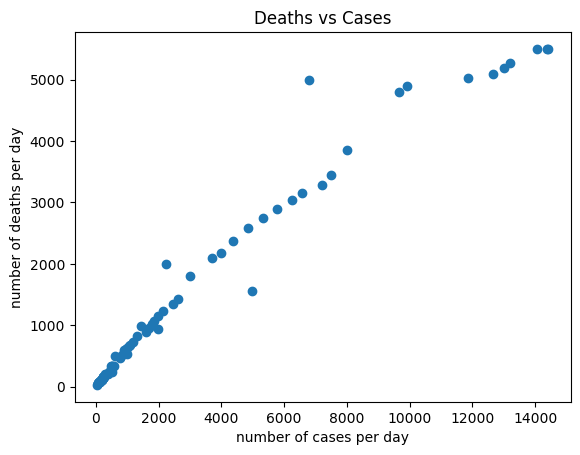

average ratio of deaths to cases: 0.5865909041003434


In [168]:
# Q8

import matplotlib.pyplot as plt
import micropip
import numpy as np
import pandas as pd


def interp_data(cases, deaths, num_days):
    # linear interpolation function for cases
    x_interp = interp1d(cases, num_days)
    
    # finding date where number of cases exceeded 100 
    num_days_exceeded_100_cases = round(float(x_interp(100)))
    num_exceeded_100_cases = np.interp(num_days_exceeded_100_cases, num_days, cases)

    # finding date where number of cases exceeded 500
    num_days_exceeded_500_cases = round(float(x_interp(500)))
    num_exceeded_500_cases = np.interp(num_days_exceeded_500_cases, num_days, cases)
    
    # finding date where number of cases exceeded 1000
    num_days_exceeded_1000_cases = round(float(x_interp(1000)))
    num_exceeded_1000_cases = np.interp(num_days_exceeded_1000_cases, num_days, cases)
    
    # finding date where number of cases exceeded 2000
    num_days_exceeded_2000_cases = round(float(x_interp(2000)))
    num_exceeded_2000_cases = np.interp(num_days_exceeded_2000_cases, num_days, cases)
    
    # finding date where number of cases exceeded 5000
    num_days_exceeded_5000_cases = round(float(x_interp(5000)))
    num_exceeded_5000_cases = np.interp(num_days_exceeded_5000_cases, num_days, cases)
    
    # linear interpolation function for deaths
    x_interp = interp1d(deaths, num_days)
    
    # finding date where number of deaths exceeded 100
    num_days_exceeded_100_deaths = round(float(x_interp(100)))
    num_exceeded_100_deaths = np.interp(num_days_exceeded_100_deaths, num_days, deaths)
 
    # finding date where number of deaths exceeded 500
    num_days_exceeded_500_deaths = round(float(x_interp(500)))
    num_exceeded_500_deaths = np.interp(num_days_exceeded_500_deaths, num_days, deaths)
    
    # finding date where number of deaths exceeded 1000
    num_days_exceeded_1000_deaths = round(float(x_interp(1000)))
    num_exceeded_1000_deaths = np.interp(num_days_exceeded_1000_deaths, num_days, deaths)
    
    # finding date where number of deaths exceeded 2000
    num_days_exceeded_2000_deaths = round(float(x_interp(2000)))
    num_exceeded_2000_deaths = np.interp(num_days_exceeded_2000_deaths, num_days, deaths)
    
    # finding date where number of deaths exceeded 5000
    num_days_exceeded_5000_deaths = round(float(x_interp(5000)))
    num_exceeded_5000_deaths = np.interp(num_days_exceeded_5000_deaths, num_days, deaths)
    
    # place missing values and dates
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_100_cases)[0][-1], num_exceeded_100_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_500_cases)[0][-1], num_exceeded_500_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_1000_cases)[0][-1], num_exceeded_1000_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_2000_cases)[0][-1], num_exceeded_2000_cases)
    cases = np.insert(cases, np.where(num_days <= num_days_exceeded_5000_cases)[0][-1], num_exceeded_5000_cases)
    
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_100_deaths)[0][-1], num_exceeded_100_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_500_deaths)[0][-1], num_exceeded_500_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_1000_deaths)[0][-1], num_exceeded_1000_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_2000_deaths)[0][-1], num_exceeded_2000_deaths)
    deaths = np.insert(deaths, np.where(num_days <= num_days_exceeded_5000_deaths)[0][-1], num_exceeded_5000_deaths)
    
    return [cases, deaths]

def problem_eight():
    workbook = pd.read_excel('ebola_download.xls')
    cases = np.array(workbook['Cases'])
    deaths = np.array(workbook['Death'])
    num_days = np.array(workbook['Noofdays'])
    # interpolated cases and deaths
    cases, deaths = interp_data(cases, deaths, num_days)
    plt.scatter(cases, deaths)
    plt.title("Deaths vs Cases")
    plt.xlabel("number of cases per day")
    plt.ylabel("number of deaths per day")
    plt.show()
    
    # calculating ratio of deaths to cases of all days recorded
    ratio_deaths_cases = deaths / cases
    
    # calculating average ratio of deaths to cases
    avg_ratio = np.sum(ratio_deaths_cases) / len(ratio_deaths_cases)
    print("average ratio of deaths to cases:", avg_ratio)
    
await micropip.install("xlrd")
problem_eight()

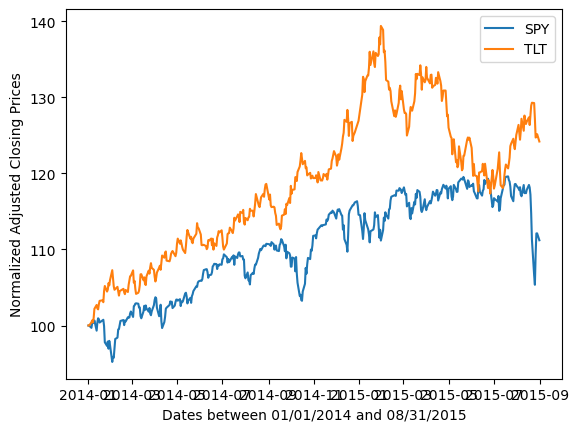

In [145]:
# Q9

import pandas as pd
import numpy as np

def problem_nine():
    spy_csv = pd.read_csv('SPY.csv', parse_dates = ['Date'])
    tlt_csv = pd.read_csv('TLT.csv', parse_dates = ['Date'])
    
    spy_csv_dates = np.array(spy_csv['Date'], dtype='datetime64[D]')
    tlt_csv_dates = np.array(tlt_csv['Date'], dtype='datetime64[D]')
    
    adj_close_spy = np.array(spy_csv['Adj Close']) 
    adj_close_tlt = np.array(tlt_csv['Adj Close'])
    
    # filter out dates between 01/01/2014 and 08/31/2015
    spy_dates_after = spy_csv_dates >= np.datetime64('2014-01-01')
    spy_dates_before = spy_csv_dates <= np.datetime64('2015-08-31')
    filtered_spy_dates = np.logical_and(spy_dates_after, spy_dates_before)
    
    tlt_dates_after = tlt_csv_dates >= np.datetime64('2014-01-01') 
    tlt_dates_before = tlt_csv_dates <= np.datetime64('2015-08-31')
    filtered_tlt_dates = np.logical_and(tlt_dates_after, tlt_dates_before)
    
    # filter out adjusted values of both stocks between 01/01/2014 and 08/31/2015
    spy_dates_filtered = spy_csv_dates[filtered_spy_dates]
    tlt_dates_filtered = tlt_csv_dates[filtered_tlt_dates]
    
    filtered_spy_adj_close = adj_close_spy[filtered_spy_dates]
    filtered_tlt_adj_close = adj_close_tlt[filtered_tlt_dates]
    
    # normalize adjusted closing values so first values of each stock is 100
    norm_adj_close_spy = (filtered_spy_adj_close / filtered_spy_adj_close[0]) * 100
    norm_adj_close_tlt = (filtered_tlt_adj_close / filtered_tlt_adj_close[0]) * 100
    
    # plot time series for both SPY and TLT on same graph
    plt.plot(spy_dates_filtered, norm_adj_close_spy, label = 'SPY')
    plt.plot(tlt_dates_filtered, norm_adj_close_tlt, label = 'TLT')
    plt.xlabel('Dates between 01/01/2014 and 08/31/2015')
    plt.ylabel('Normalized Adjusted Closing Prices')
    plt.legend()
    plt.show()
    

problem_nine()

In [146]:
# Q10

import pandas as pd
import numpy as np 

def problem_ten():
    spy_csv = pd.read_csv('SPY.csv', parse_dates = ['Date'])
    tlt_csv = pd.read_csv('TLT.csv', parse_dates = ['Date'])
    
    spy_csv_dates = np.array(spy_csv['Date'], dtype='datetime64[D]')
    tlt_csv_dates = np.array(tlt_csv['Date'], dtype='datetime64[D]')
    
    adj_close_spy = np.array(spy_csv['Adj Close']) 
    adj_close_tlt = np.array(tlt_csv['Adj Close'])
    
    # filter out dates between 01/01/2014 and 08/31/2015
    spy_dates_after = spy_csv_dates >= np.datetime64('2014-01-01')
    spy_dates_before = spy_csv_dates <= np.datetime64('2015-08-31')
    filtered_spy_dates = np.logical_and(spy_dates_after, spy_dates_before)
    
    tlt_dates_after = tlt_csv_dates >= np.datetime64('2014-01-01') 
    tlt_dates_before = tlt_csv_dates <= np.datetime64('2015-08-31')
    filtered_tlt_dates = np.logical_and(tlt_dates_after, tlt_dates_before)
    
    # filter out adjusted values of both stocks between 01/01/2014 and 08/31/2015
    spy_dates_filtered = spy_csv_dates[filtered_spy_dates]
    tlt_dates_filtered = tlt_csv_dates[filtered_tlt_dates]
    
    # convert numpy to panda arrays
    filtered_spy_adj_close = adj_close_spy[filtered_spy_dates]
    filtered_spy_adj_close = pd.DataFrame(filtered_spy_adj_close)
    
    # convert numpy to panda arrays
    filtered_tlt_adj_close = adj_close_tlt[filtered_tlt_dates]
    filtered_tlt_adj_close = pd.DataFrame(filtered_tlt_adj_close)
    
    # calculate daily returns for both stocks via panda.pct_change method
    spy_daily_return = filtered_spy_adj_close.pct_change(1)[1:] 
    tlt_daily_return = filtered_tlt_adj_close.pct_change(1)[1:]
    
    # calculate max daily returns for both stocks
    max_spy_daily_return = spy_daily_return.max() * 100
    max_tlt_daily_return = tlt_daily_return.max() * 100
    
    # calculate min daily returns for both stocks
    min_spy_daily_return = spy_daily_return.min() * 100
    min_tlt_daily_return = tlt_daily_return.min() * 100
    
    # calculate average daily returns for both stocks
    avg_spy_daily_return = spy_daily_return.mean() * 100
    avg_tlt_daily_return = tlt_daily_return.mean() * 100
    
    print("max SPY daily return:", max_spy_daily_return)
    print("max TLT daily return:", max_tlt_daily_return)
    
    print("min SPY daily return:", min_spy_daily_return)
    print("min TLT daily return:", min_tlt_daily_return)
    
    print("average SPY daily return:", avg_spy_daily_return)
    print("average TLT daily return:", avg_tlt_daily_return)
    
    
problem_ten()

max SPY daily return: 0    3.839375
dtype: float64
max TLT daily return: 0    2.646922
dtype: float64
min SPY daily return: 0   -4.210687
dtype: float64
min TLT daily return: 0   -2.43248
dtype: float64
average SPY daily return: 0    0.028612
dtype: float64
average TLT daily return: 0    0.055378
dtype: float64
